# Data Science, Deep Learning, & Machine Learning with Python
## Activity 15
Arash Nouri


### Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data

Loading libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from sklearn.externals.six import StringIO 
import pydotplus

Loading data

In [2]:
data = pd.read_csv('PastHires.csv')
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


Statistical data

In [3]:
data.describe(include = 'all').transpose

<bound method DataFrame.transpose of         Years Experience Employed?  Previous employers Level of Education  \
count          13.000000        13           13.000000                 13   
unique               NaN         2                 NaN                  3   
top                  NaN         N                 NaN                 BS   
freq                 NaN         8                 NaN                  7   
mean            5.153846       NaN            1.769231                NaN   
std             6.348834       NaN            2.006400                NaN   
min             0.000000       NaN            0.000000                NaN   
25%             0.000000       NaN            0.000000                NaN   
50%             3.000000       NaN            1.000000                NaN   
75%             7.000000       NaN            2.000000                NaN   
max            20.000000       NaN            6.000000                NaN   

       Top-tier school Interned Hired 

In [4]:
data.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

Categorical data

In [5]:
labelencoder = LabelEncoder()
data['Employed?'] = labelencoder.fit_transform(data["Employed?"])
data['Level of Education'] = labelencoder.fit_transform(data["Level of Education"])
data['Top-tier school'] = labelencoder.fit_transform(data["Top-tier school"])
data['Interned'] = labelencoder.fit_transform(data["Interned"])
data['Hired'] = labelencoder.fit_transform(data["Hired"])
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Defining independence and dependence variables

In [6]:
X = data.iloc[:,:6]
X

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0
5,0,0,0,2,1,1
6,5,1,2,1,0,1
7,3,0,1,0,0,1
8,15,1,5,0,0,0
9,0,0,0,0,0,0


In [7]:
y = data.iloc[:,6]
y

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    1
Name: Hired, dtype: int64

Defining the tree

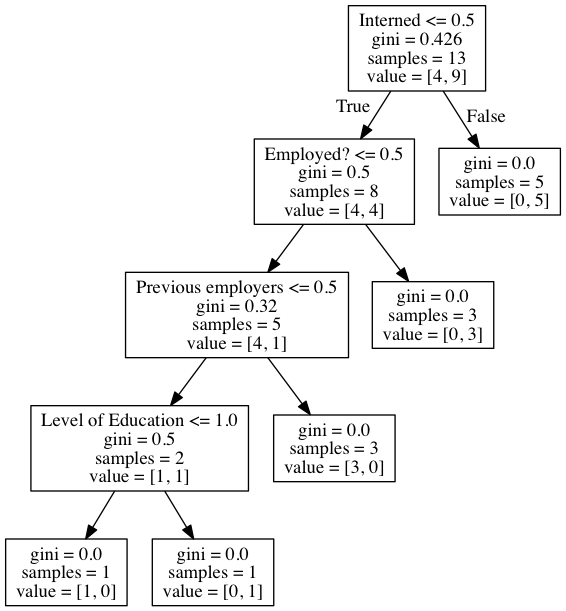

In [14]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

features = list(X.columns)
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Modyfied the data to see the differences in results

In [22]:
Hired2 = []
for i in data['Hired']:
    if i == 1:
        new_i = 0
    else:
        new_i = 1
    Hired2.append(new_i)
data['Hired2'] = Hired2
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired,Hired2
0,10,1,4,0,0,0,1,0
1,0,0,0,0,1,1,1,0
2,7,0,6,0,0,0,0,1
3,2,1,1,1,1,0,1,0
4,20,0,2,2,1,0,0,1


Defining the new y as y2

In [23]:
y2 = data['Hired2']
y2

0     0
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
Name: Hired2, dtype: int64

Fitting the new tree

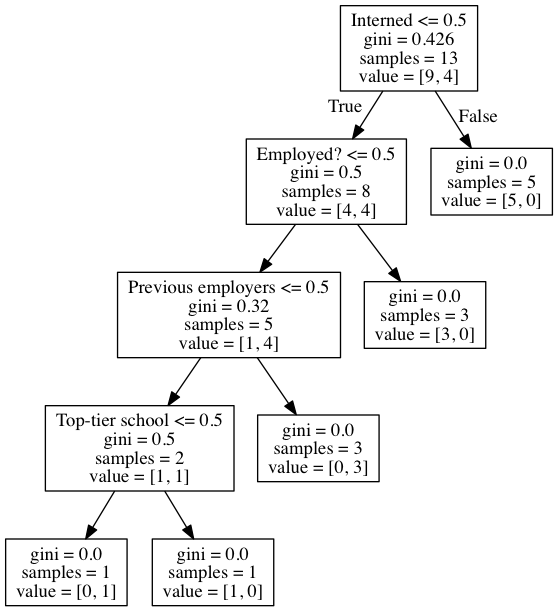

In [24]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X,y2)

features = list(X.columns)
dot_data = StringIO()  
tree.export_graphviz(clf2, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  